<h2 style='color:green'>Exercise</h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [3]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
#read the dataset into the notebook
df = pd.read_csv('carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [5]:
#check the data for missing values
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [11]:
#check the unique values in the 'car model' column
df['Car Model'].value_counts()

BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: Car Model, dtype: int64

In [14]:
#convert car model to dummy variables
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [15]:
#merge dummies with df
merged_df = pd.concat([df,dummies], axis = 1)
merged_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [17]:
final_merged_df = merged_df.drop(columns = ['Car Model'])
final_merged_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [18]:
#drop one of the dummy variables to avoid multicollinearity
final_df = final_merged_df.drop('Mercedez Benz C class', axis = 1)
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


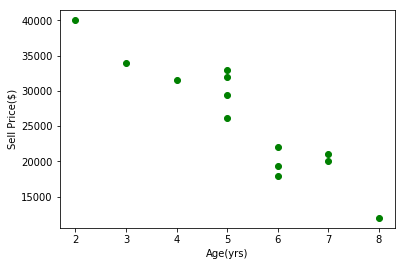

In [19]:
#scatter plot to check if a linear regression model would be suitable
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(final_df['Age(yrs)'],final_df['Sell Price($)'],color='g',marker='o')

### From the above plot, there is a negative linear relationship between the price of the cars and Age i.e as the car ages the price reduces. Hence we can use a linear model to predict

In [20]:
#define the independent variables
x = final_df.drop(columns = ['Sell Price($)'])
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [21]:
#define the dependent variable
y = final_df['Sell Price($)']

In [22]:
#define the regression object
lm = linear_model.LinearRegression()

In [28]:
#fit the model with the data 
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
#use the values of x to predict prices
lm.predict(x)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [27]:
# Predict price of a mercedez benz that is 4 yr old with mileage 45000
lm.predict([[45000,4,0,0]])

array([36991.31721061])

In [30]:
#Predict price of a BMW X5 that is 7 yr old with mileage 86000
lm.predict([[86000,7,0,1]])

array([11080.74313219])

In [24]:
#model accuracy score
lm.score(x,y)

0.9417050937281083